## Handling the endTime column: Seperating the date and time

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from datetime import datetime

In [55]:

df = pd.read_csv('final_data.csv')

In [56]:
df

,endTime,artistName,trackName,msPlayed,id,genre,language
0,2021-12-16 12:22,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",90000,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi
1,2021-12-17 17:51,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",15868,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi
2,2022-03-24 05:43,Mithoon,Jaan Ban Gaye,211673,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi
3,2022-05-20 17:32,Mithoon,Jaan Ban Gaye,30010,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi
4,2022-08-27 11:27,Mithoon,Jaan Ban Gaye,211673,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi
...,...,...,...,...,...,...,...
7104,2022-11-21 19:13,Zaeden,tere bina,9023,5lMNphVhMLvhFmTWiKiLA2,"['desi pop', 'hindi indie', 'indian edm']",Hindi
7105,2022-11-30 10:51,Naseebo Lal,Tu Jhoom,397546,4sAweKU7CjDZ1bUEb6VF6a,['classic pakistani pop'],Hindi
7106,2022-12-01 07:43,Naseebo Lal,Tu Jhoom,43265,4sAweKU7CjDZ1bUEb6VF6a,['classic pakistani pop'],Hindi
7107,2022-12-08 17:16,Farhan Saeed,Thodi Der,116917,1W67L8OH9z7C3b9YJJbVYq,"['modern bollywood', 'pakistani pop']",Hindi


Example: using datetime

In [57]:
from datetime import datetime

# datetime in string format
str_dt1 = '2021/10/20 09:15:32.36980'
str_dt2 = '2022/2/20 04:25:42.120450'

# convert string to datetime
dt1 = datetime.strptime(str_dt1, "%Y/%m/%d %H:%M:%S.%f")
dt2 = datetime.strptime(str_dt2, "%Y/%m/%d %H:%M:%S.%f")

# difference between datetime in timedelta
delta = dt2 - dt1
print(f'Difference is {delta.days} days')

Difference is 122 days


In [58]:
dt1.date()

datetime.date(2021, 10, 20)

Example: using pandas

In [59]:
df.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
id            object
genre         object
language      object
dtype: object

In [60]:
date_time=pd.to_datetime(df['endTime'])

In [61]:
date_time[0].date()

datetime.date(2021, 12, 16)

In [62]:
date_time[0].time()

datetime.time(12, 22)

In [63]:
date_time[0].month

12

In [64]:
date_time[0].year       

2021

In [65]:
date_time[0].week

50

In [66]:
df["date_time"] =  date_time

In [67]:
df.head(2)

,endTime,artistName,trackName,msPlayed,id,genre,language,date_time
0,2021-12-16 12:22,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",90000,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-16 12:22:00
1,2021-12-17 17:51,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",15868,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-17 17:51:00


In [68]:
df['date']=df['date_time'].dt.date

In [69]:
df['month']=df['date_time'].dt.month

In [70]:
df['year']=df['date_time'].dt.year

In [71]:
df['week'] = df['date_time'].dt.week

/tmp/ipykernel_11398/3811373960.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date_time'].dt.week


In [72]:
df.head(10)

,endTime,artistName,trackName,msPlayed,id,genre,language,date_time,date,month,year,week
0,2021-12-16 12:22,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",90000,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-16 12:22:00,2021-12-16,12,2021,50
1,2021-12-17 17:51,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",15868,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-17 17:51:00,2021-12-17,12,2021,50
2,2022-03-24 05:43,Mithoon,Jaan Ban Gaye,211673,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-03-24 05:43:00,2022-03-24,3,2022,12
3,2022-05-20 17:32,Mithoon,Jaan Ban Gaye,30010,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-05-20 17:32:00,2022-05-20,5,2022,20
4,2022-08-27 11:27,Mithoon,Jaan Ban Gaye,211673,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-08-27 11:27:00,2022-08-27,8,2022,34
5,2022-11-07 04:28,Mithoon,Jaan Ban Gaye,211673,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-11-07 04:28:00,2022-11-07,11,2022,45
6,2022-11-18 12:51,Mithoon,"Darkhaast (feat. Arijit Singh, Sunidhi Chauhan)",29751,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-11-18 12:51:00,2022-11-18,11,2022,46
7,2022-11-18 13:02,Mithoon,"Darkhaast (feat. Arijit Singh, Sunidhi Chauhan)",374205,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-11-18 13:02:00,2022-11-18,11,2022,46
8,2022-11-18 13:17,Mithoon,"Darkhaast (feat. Arijit Singh, Sunidhi Chauhan)",8799,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-11-18 13:17:00,2022-11-18,11,2022,46
9,2022-11-20 18:06,Mithoon,Jaan Ban Gaye,27208,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2022-11-20 18:06:00,2022-11-20,11,2022,46


In [73]:
df['month'].value_counts()

3     1683
4     1266
7      733
8      732
5      721
11     503
6      299
12     278
2      257
9      253
1      215
10     169
Name: month, dtype: int64

In [74]:
df['year'].value_counts()

2022    6914
2021     195
Name: year, dtype: int64

In [75]:
df['minutes']=(df['msPlayed']/1000)/60

In [76]:
df.head(2)

,endTime,artistName,trackName,msPlayed,id,genre,language,date_time,date,month,year,week,minutes
0,2021-12-16 12:22,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",90000,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-16 12:22:00,2021-12-16,12,2021,50,1.500000
1,2021-12-17 17:51,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",15868,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-17 17:51:00,2021-12-17,12,2021,50,0.264467


In [77]:
df['date'][0]=='2021-12-01'

False

In [78]:
df['date'][0]

datetime.date(2021, 12, 16)

In [79]:
type(df['date'][0])

datetime.date

In [80]:
datetime(2021,12,6).date()

datetime.date(2021, 12, 6)

In [81]:
type(datetime(2021,12,16).date())

datetime.date

In [82]:
df['date'][0]==datetime(2021,12,16).date()

True

Year=2021

In [83]:
len(df[(df['year']==2021) & (df['month']==12)])

195

In [84]:
len(df[df['year']==2021])

195

In [85]:
year_2021=df[(df['year']==2021) & (df['month']==12)]

In [86]:
year_2021['week'].value_counts()

52    115
51     73
50      7
Name: week, dtype: int64

In [87]:
year_2021[year_2021['week']==50]

,endTime,artistName,trackName,msPlayed,id,genre,language,date_time,date,month,year,week,minutes
0,2021-12-16 12:22,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",90000,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-16 12:22:00,2021-12-16,12,2021,50,1.500000
1,2021-12-17 17:51,Mithoon,"Aashiqui Aa Gayi(From ""Radhe Shyam"")",15868,09UmIX92EUH9hAK4bxvHx6,"['desi pop', 'filmi', 'modern bollywood', 'sufi']",Hindi,2021-12-17 17:51:00,2021-12-17,12,2021,50,0.264467
14,2021-12-17 17:58,Sanam,Aap Ki Nazron Ne Samjha,186737,7o7doCwqft91WC690aglWC,"['desi pop', 'modern bollywood']",Hindi,2021-12-17 17:58:00,2021-12-17,12,2021,50,3.112283
15,2021-12-17 18:01,Sanam,Aap Ki Nazron Ne Samjha,186737,7o7doCwqft91WC690aglWC,"['desi pop', 'modern bollywood']",Hindi,2021-12-17 18:01:00,2021-12-17,12,2021,50,3.112283
16,2021-12-17 18:05,Sanam,Aap Ki Nazron Ne Samjha,164350,7o7doCwqft91WC690aglWC,"['desi pop', 'modern bollywood']",Hindi,2021-12-17 18:05:00,2021-12-17,12,2021,50,2.739167
51,2021-12-17 18:07,"Sippy Gill, Desi Roots",Suhe Bullan Waliye,162857,3YoYru7MdcyhImg7mUHFic,"['desi pop', 'punjabi pop']",Punjabi,2021-12-17 18:07:00,2021-12-17,12,2021,50,2.714283
52,2021-12-17 18:08,"Sippy Gill, Desi Roots",Suhe Bullan Waliye,34787,3YoYru7MdcyhImg7mUHFic,"['desi pop', 'punjabi pop']",Punjabi,2021-12-17 18:08:00,2021-12-17,12,2021,50,0.579783


#### 5th week of the year 2021

In [88]:
year_2021[year_2021['week']==50]['minutes'].sum()

14.022266666666665

In [89]:
hindi_song_time=year_2021[(year_2021['week']==50)&(year_2021['language']=='Hindi')]['minutes'].sum()
hindi_song_time

10.7282

In [90]:
punjabi_song_time=year_2021[(year_2021['week']==50)&(year_2021['language']=='Punjabi')]['minutes'].sum()
punjabi_song_time

3.2940666666666667

In [91]:
time_in_minute = [hindi_song_time,punjabi_song_time]

In [92]:
year_2021[year_2021['week']==50]['language'].value_counts()

Hindi      5
Punjabi    2
Name: language, dtype: int64

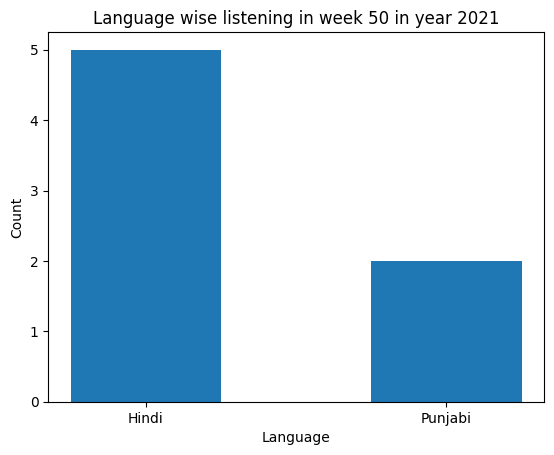

In [93]:
plt.bar(year_2021[year_2021['week']==50]['language'].value_counts().index,year_2021[year_2021['week']==50]['language'].value_counts(),width=0.5)
plt.title('Language wise listening in week 50 in year 2021')
plt.xlabel('Language')
plt.ylabel('Count');

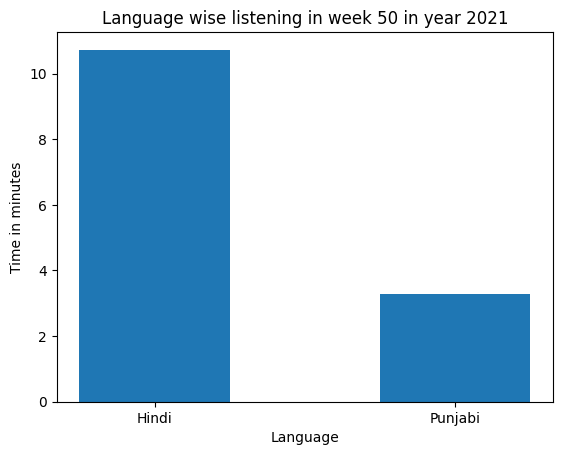

In [94]:
plt.bar(year_2021[year_2021['week']==50]['language'].value_counts().index,time_in_minute,width=0.5)
plt.title('Language wise listening in week 50 in year 2021')
plt.xlabel('Language')
plt.ylabel('Time in minutes');

#### 52th week of the year 2021

In [97]:
drop_axis = ['endTime','date_time','msPlayed','id','genre']

In [98]:
final_visualization_data = df.drop(drop_axis,axis=1)

In [100]:
final_visualization_data.to_csv('final_visualization_data.csv',index=False)